                                                        AIRBnB Dataset

OBJECTIVE : THE AIM IS TO CLEAN , TRANSFORM , VISUALIZE  & ENGINEER THE DATA and DRAW VALUABLE INSIGHTS 

OPERATIONS PERFORMED : 
    
    > EXPLORATORY DATA ANALYSIS
    > DATA VISUALIZATION
    > FEATURE ENGINEERING
    > DATA INSIGHTS & CONCLUSION

In [1]:
#Importing the necessary libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#reading the dataset 

df = pd.read_csv('AB_NYC_2019.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
#exploring the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#checking for missing values 

def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100
    return pd.concat((total , percent) , axis =1 , keys  = ['TOTAL' , 'PERCENTAGE'])

miss_values = missing_values(df)
miss_values[miss_values != 0]

,TOTAL,PERCENTAGE
last_review,10052.0,20.558339
reviews_per_month,10052.0,20.558339
host_name,21.0,0.042949
name,16.0,0.032723
id,NaN,NaN
host_id,NaN,NaN
neighbourhood_group,NaN,NaN
neighbourhood,NaN,NaN
latitude,NaN,NaN
longitude,NaN,NaN


In [6]:
df[['last_review' , 'reviews_per_month']]

,last_review,reviews_per_month
0,10/19/2018,0.21
1,5/21/2019,0.38
2,NaN,NaN
3,7/5/2019,4.64
4,11/19/2018,0.10
...,...,...
48890,NaN,NaN
48891,NaN,NaN
48892,NaN,NaN
48893,NaN,NaN


In [7]:
# since there is 20% of missing values and its not replacable we will drop those rows 

df.dropna(inplace = True)

In [8]:
len(df)

38821

In [9]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194


                                                      EXPLORATORY  DATA  ANALYSIS 

1.  Number of properties listed in each neighbourhood

In [10]:
#visualizing the number of properties listed in each neighbourhood .

labels = df['neighbourhood_group'].value_counts().sort_values(ascending = False).index
labels

Index(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], dtype='object')

In [11]:
values = df['neighbourhood_group'].value_counts().sort_values(ascending = False).values
values

array([16621, 16439,  4572,   875,   314])

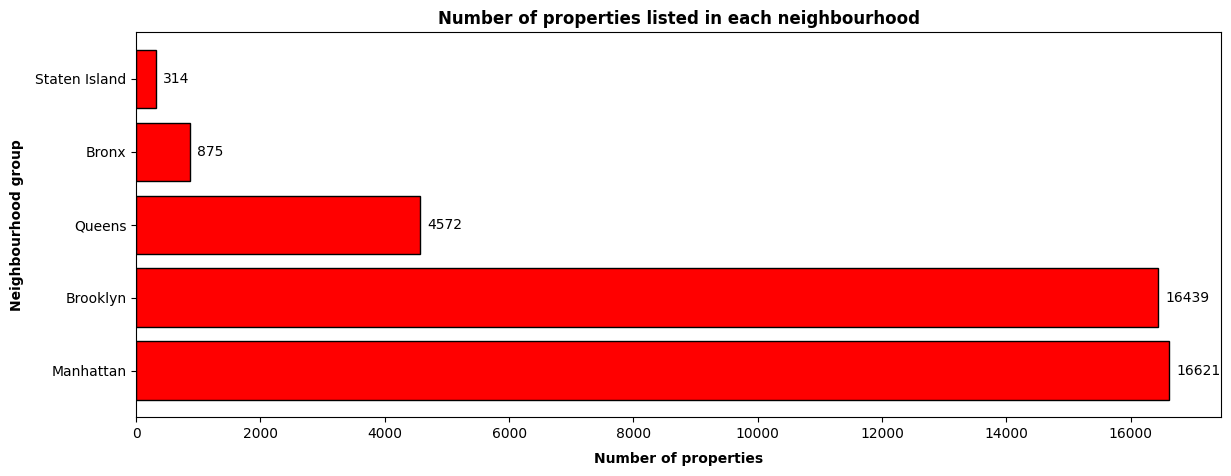

In [12]:
plt.figure(figsize = (14 , 5))
bar = plt.barh( labels , values , color = 'red' , edgecolor = 'black')
plt.bar_label( bar, fmt = '%0.0f' , fontsize = 10 , padding = 5)
plt.ylabel('Neighbourhood group' , labelpad = 8 , fontweight = 'bold')
plt.xlabel('Number of properties' , labelpad = 8 , fontweight = 'bold')
plt.title('Number of properties listed in each neighbourhood' , fontweight = 'bold')
plt.show()

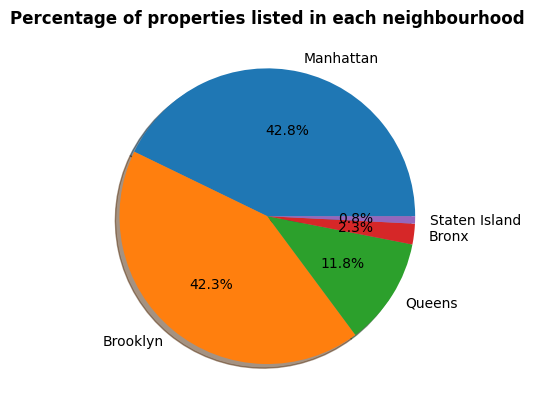

In [13]:
#visualizing the same in a pie chart 

plt.pie(values , labels = labels , autopct = '%1.1f%%'  , shadow={'ox': -0.04, 'edgecolor': 'black', 'shade': 5})
plt.title('Percentage of properties listed in each neighbourhood' , fontweight = 'bold')
plt.show()

2. Average price of each neighbourhood

In [14]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194


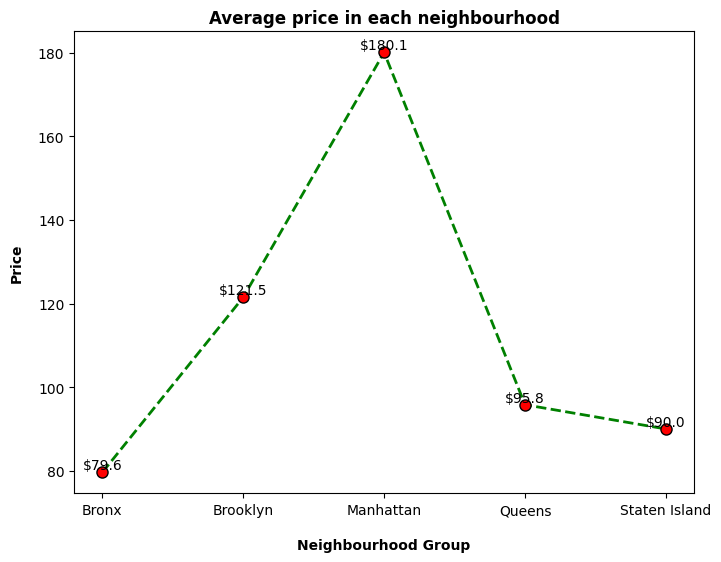

In [15]:
#plotting a lineplot to visualize the average price in each neighbourhood

plt.figure(figsize=(8,6))
x = df.groupby('neighbourhood_group')['price'].mean().index
y = df.groupby('neighbourhood_group')['price'].mean().values.round(1)
plt.plot(x , y , linestyle = '--' , linewidth = 2 , color = 'green' , marker = 'o' , markerfacecolor = 'red' , markeredgecolor = 'black' , markersize = 8)
plt.title('Average price in each neighbourhood' , fontweight = 'bold' )
plt.xlabel('Neighbourhood Group' , fontweight = 'bold' , labelpad = 15)
plt.ylabel('Price' , fontweight = 'bold' , labelpad = 10)

#displaying the price value on each marker.

for i , txt in enumerate(y):
    plt.text(x[i] , y[i] , f'${txt}' , ha = 'center' , va = 'bottom')

3 . Total bookings in a month 

In [16]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194


In [17]:
df['last_review'] = pd.to_datetime(df['last_review'])
months = df['last_review'].dt.month.value_counts().index
bookings = df['last_review'].dt.month.value_counts().values

In [18]:
#replacing the month numbers with actual month name

month = months.map({1 : 'Jan' , 2 : 'Feb' , 3: 'March' , 4 : 'Apr' , 5 : 'May' , 6 : 'June' , 7 : 'July' , 8 : 'Aug' , 9 : 'Sept' , 10 : 'Oct' , 11 : 'Nov' , 12 : 'Dec'})
month

Index(['June', 'July', 'May', 'Jan', 'Apr', 'Dec', 'Aug', 'Oct', 'Sept',
       'March', 'Nov', 'Feb'],
      dtype='object')

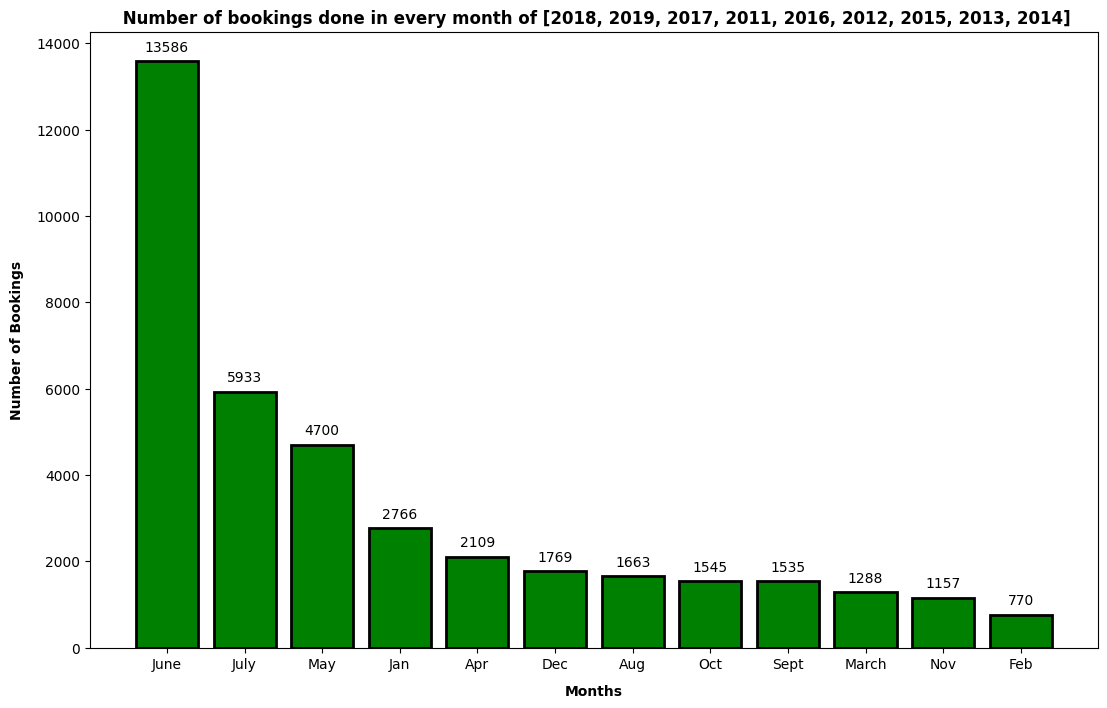

In [19]:
#plotting a bar graph 

plt.figure(figsize = ( 13 , 8))
bar2 = plt.bar(month , bookings  , color = 'green' , edgecolor = 'black' , linewidth = 2)
plt.bar_label( bar2, fmt = '%0.0f' , fontsize = 10 , padding = 5)
plt.xlabel('Months' , labelpad = 9 , fontweight = 'bold')
plt.ylabel('Number of Bookings' , labelpad = 9, fontweight = 'bold')
plt.title(' Number of bookings done in every month of [2018, 2019, 2017, 2011, 2016, 2012, 2015, 2013, 2014]' , fontweight = 'bold')
plt.show()

4 . Booking done & average price by room type .

In [20]:
# number of bookings done by room type .

room_type = df['room_type'].value_counts().index
room_bookings = df['room_type'].value_counts().values
room_avg_price = df.groupby('room_type')['price'].mean().values.round(1)

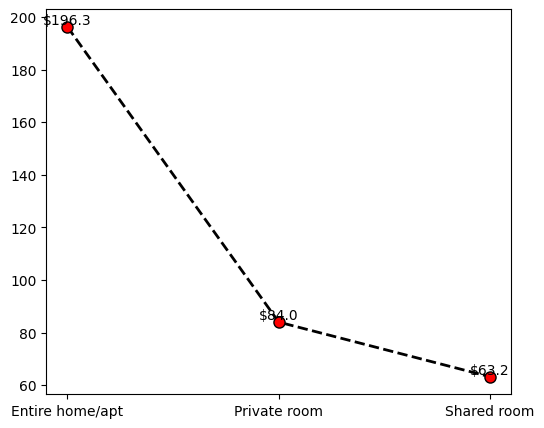

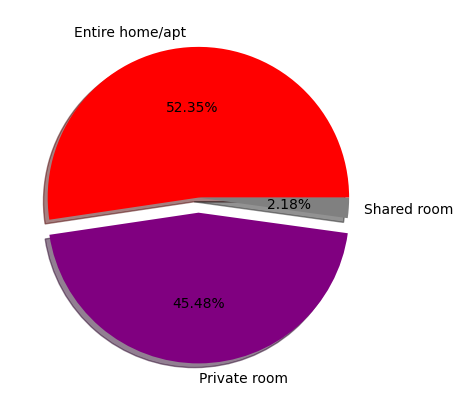

In [21]:
#visualizing it in a single chart

#creating the first subplot

plt.figure(figsize = (6, 5))
plt.subplot(1 ,1 , 1)
L1 = plt.plot(room_type , room_avg_price , marker = 'o' , linestyle = '--' , linewidth = '2' , color = 'black' , markerfacecolor = 'red' , markeredgecolor = 'black' , markersize = 8)

for i , txt in enumerate(room_avg_price):
    plt.text(room_type[i] , room_avg_price[i] , f'${txt}' , ha = 'center' , va = 'bottom')

plt.show()

#creating the second subplot

plt.figure(figsize = (12 , 8))
plt.subplot(2 , 1 , 2)
plt.pie(room_bookings , labels = room_type , autopct = '%1.2f%%' , explode = ( 0 , 0.1 , 0) , colors = ['red' , 'purple' , 'grey'] , shadow = True)


plt.tight_layout()
plt.show()

                                                          FEATURE  ENGINEERING 

In [22]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [23]:
#Encoding 'neighbourhood_group'  & 'room_type'  using label encoder 

from sklearn.preprocessing import LabelEncoder

df['neighbourhood_group'] = LabelEncoder().fit_transform(df['neighbourhood_group'])
df['room_type'] = LabelEncoder().fit_transform(df['room_type'])

In [24]:
#seperating the last review column to day , month & year

df['day'] = df['last_review'].dt.day
df['month'] = df['last_review'].dt.month
df['year'] = df['last_review'].dt.year

In [25]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,day,month,year
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365,19,10,2018


In [26]:
#dropping unncessary columns

df.drop(['id', 'name', 'host_id', 'host_name', 'last_review' , 'neighbourhood'] , axis = 1 ,  inplace = True)

In [27]:
df.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,day,month,year
0,1,40.64749,-73.97237,1,149,1,9,0.21,6,365,19,10,2018
1,2,40.75362,-73.98377,0,225,1,45,0.38,2,355,21,5,2019
3,1,40.68514,-73.95976,0,89,1,270,4.64,1,194,5,7,2019


In [28]:
#combining both latitude & longitude to same column

df['lat_long'] = list(zip(df['latitude'] , df['longitude']))
df.drop(['latitude' , 'longitude'] , axis = 1 , inplace = True)
df.head(2)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,day,month,year,lat_long
0,1,1,149,1,9,0.21,6,365,19,10,2018,"(40.64749, -73.97237)"
1,2,0,225,1,45,0.38,2,355,21,5,2019,"(40.75362, -73.98377)"


SO HERE WE HAVE COMPLETED THE FEATURE ENGINEERING OF THE DATASET 

                                                    DATA  INSIGHTS  &  CONCLUSION

->> Manhattan has the highest number of properties listed among other neighbourhood with a total number of 16,621 properties which results in 42.8% 
    of the total properties listed . Followed by Brooklyn having 16,439 properties with a share of 42.3%
    
->> Manhattan has the highest average price with 180.1 and brox having the lowest $79.6 . This is due to manhattan being a metropolitan
    city and accordingly the cost of living is high .

->> June has the highest number of bookings & February has the lowest number of bookings . This is due to Summer in june which has a lot of vacations
    and is a ideal time for travelling . While february isnt a ideal time to travel because of winter season . \
    
->> 52.35% of bookings were entire apartments & 45.48% were private rooms . Only 2.18% of the bookings were shared rooms .